In [142]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [143]:
lambda_A = 0.5
lambda_B = 0.3

In [144]:
def System(y,t,lambda_A,lambda_B):
    
    N_A, N_B, N_C = y
    
    dN_A_dt = -lambda_A * N_A
    dN_B_dt = lambda_A * N_A - lambda_B * N_B
    dN_C_dt = lambda_B *N_B
    
    return [dN_A_dt,dN_B_dt,dN_C_dt]

In [145]:
t = np.linspace(0,10,500)
N0 = [500,0,0.]

In [146]:
sol = odeint(System, N0, t, args=(0.5,0.3))

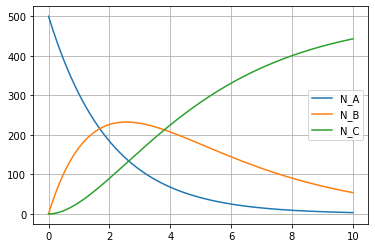

In [147]:
plt.plot(t,sol[:,0], label='N_A')
plt.plot(t,sol[:,1], label='N_B')
plt.plot(t,sol[:,2], label='N_C')
plt.legend()
plt.grid()

In [148]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1],r[2]])
    K1 = f(state1,t,lambda_A,lambda_B)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h,lambda_A,lambda_B)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h,lambda_A,lambda_B)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h,lambda_A,lambda_B)
    Deltaf = np.zeros(3)
    Deltaf[0] = h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])/6
    Deltaf[1] = h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])/6
    Deltaf[2] = h*(K1[2]+2*K2[2]+2*K3[2]+K4[2])/6
    
    return r+Deltaf

In [149]:
def Adaptativo(f,r0,t,e=1e-4):
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    r = r0
    Time = np.array([t])
    Vector = r

    while t < tf:
        r1 = Increment(f,r,t,h)
        r2 = Increment(f,r1,t+h,h)
        rt = Increment(f,r,t,2*h)

        error = np.linalg.norm( r2 - rt )
        if error < e:
            t += 2*h
            r = rt
            Time = np.append(Time,t)
            Vector = np.vstack((Vector,r))
        #else:
        q = 0.85*(e/error)**(1/4)
        h = h*q
        
        #r = Increment(f,r,t,h)
        #print(h)
    return Time,Vector

In [150]:
t1,x1 = Adaptativo(System,N0,t)

In [151]:
len(t1)

39

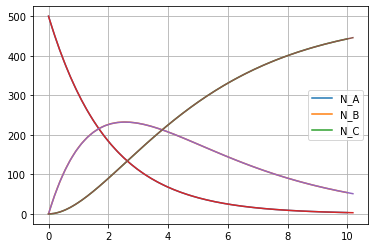

In [152]:
plt.plot(t,sol[:,0], label='N_A')
plt.plot(t,sol[:,1], label='N_B')
plt.plot(t,sol[:,2], label='N_C')
plt.plot(t1,x1[:,0])
plt.plot(t1,x1[:,1])
plt.plot(t1,x1[:,2])
plt.grid()
plt.legend()

E) Teniendo en cuenta que la rutina adaptativa disminuye el tamaño de la solución (39) no se puede hacer una diferencia entre la solución de Odeint y nuestra rutina. Sin embargo, al comparar ambas soluciones gráficamente, no se aprecia una diferencia significativa entre una y otra.

(f) y (g)

In [153]:
indice_max_B = np.argmax(sol[:, 1])
tiempo_max_B = t[indice_max_B]
tiempo_max_B

2.5450901803607215

In [154]:
Cantidad_B_max=np.max(sol[:,1])
print(Cantidad_B_max)
Cantidad_C_max=sol[indice_max_B, 2]
print(Cantidad_C_max)

232.37757341544298
127.5635320912864


h) Teniendo en cuenta que la abundancia de partículas B depende de la desintegración de particulas A, y a su vez del propio decaimiento hacia partículas C. Si se observa la 3ra ecuación diferencial se observa que N_B es la tasa de decaimiento de C (dNc/dt) entre lambda_B; por lo tanto, N_B es máximo cuando la pendiente de la partículas C es máxima.